In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv('/Users/kelvinfoo/Desktop/AI Masters/TripAdvisor NLP/Data/cleaned_reviews.csv')
df.head()

,Unnamed: 0,Review,Rating,cleaned_reviews
0,0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...
1,1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...
2,2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experi hotel monaco seattl good ...
3,3,"unique, great stay, wonderful time hotel monac...",5,uniqu great stay wonder time hotel monaco loca...
4,4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


### **Split Data into Train and Test Set**

In [4]:
X = df['cleaned_reviews']
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Machine Learning with TF-IDF (1-gram)**

In [5]:
def train_and_evaluate_model(model, xtrain, xtest, ytrain, ytest):
    model.fit(xtrain,  ytrain)
    y_pred = model.predict(xtest)

    print(f"Precision: {precision_score(y_pred, ytest, average = 'weighted')}")
    print(f"Recall: {recall_score(y_pred, ytest, average = 'weighted')}")
    print(f"Accuracy: {accuracy_score(y_pred, ytest)}")
    
    cm = confusion_matrix(ytest, y_pred, labels=[1, 2, 3, 4, 5])
    sns.heatmap(cm, annot=True, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
    plt.xlabel('Predicted Rating')
    plt.ylabel('Actual Rating')
    plt.show()

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_features = 10000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Precision: 0.6735865269507334
Recall: 0.632837277384728
Accuracy: 0.632837277384728


/Users/kelvinfoo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


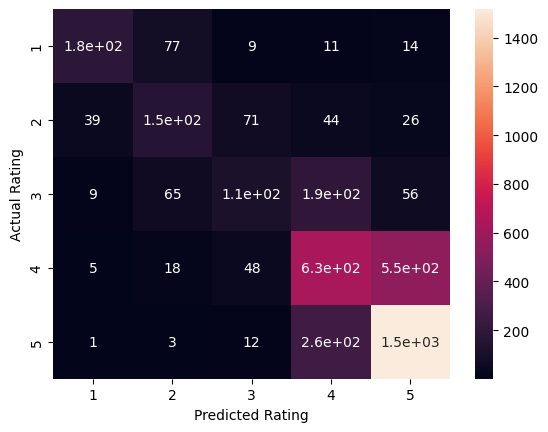

In [13]:
# Train and evaluate logistic regression model 
lr = LogisticRegression()
train_and_evaluate_model(lr, X_train_tfidf, X_test_tfidf, y_train, y_test)

Precision: 0.764642042736898
Recall: 0.5430592827518907
Accuracy: 0.5430592827518907


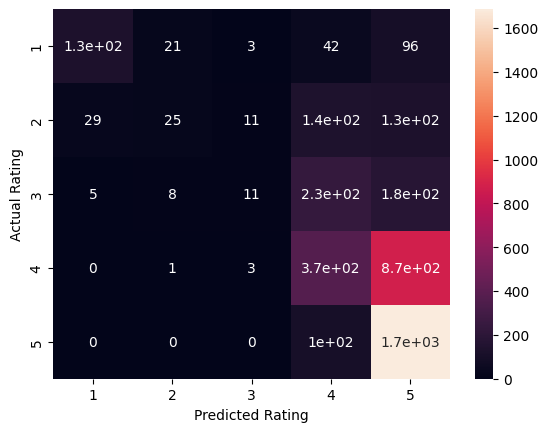

In [14]:
rf = RandomForestClassifier()
train_and_evaluate_model(rf, X_train_tfidf, X_test_tfidf, y_train, y_test)

### **Machine Learning with TF-IDF (1 and 2-gram)**

In [6]:
tfidf_vectorizer = TfidfVectorizer(max_features = 10000, ngram_range = (1,2))

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Precision: 0.683548743434501
Recall: 0.641619907294462
Accuracy: 0.641619907294462


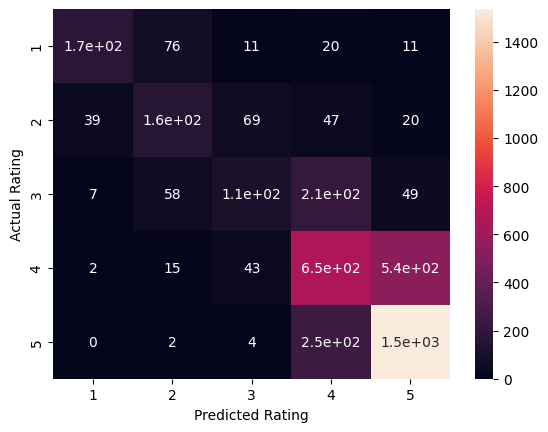

In [7]:
lr = LogisticRegression()
train_and_evaluate_model(lr, X_train_tfidf, X_test_tfidf, y_train, y_test)

Precision: 0.7378796387138891
Recall: 0.5447670163454501
Accuracy: 0.5447670163454501


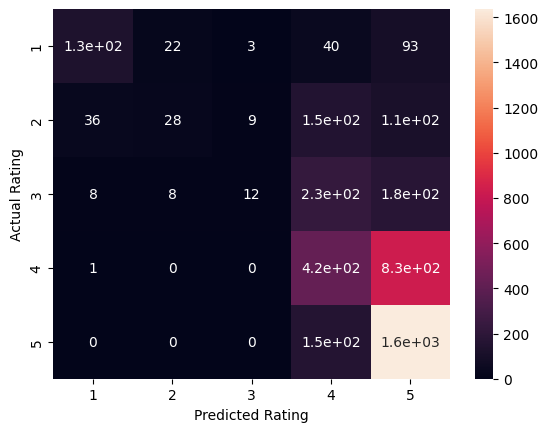

In [8]:
rf = RandomForestClassifier()
train_and_evaluate_model(rf, X_train_tfidf, X_test_tfidf, y_train, y_test)